<a href="https://colab.research.google.com/github/HR-Riad/Course-Registration-System/blob/main/Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing all Dependencies
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
import nltk
nltk.download('stopwords')
# printing the stopwords in English
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

Data Pre-processing

In [4]:
fake_news = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/Data Mining Project/Fake.csv")
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_news = pd.read_csv("../content/drive/MyDrive/Colab Notebooks/Data Mining Project/True.csv")
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
# Create a column with fake=1 in fake_news dataset
fake_news['label']=1
fake_news.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
# Create a column with fake=0 in true_news dataset
true_news['label'] = 0
true_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [8]:
# Concat two fake and true news
news = pd.concat([fake_news, true_news])
news.sample(5)
news_dataset=news
news_dataset

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


In [9]:
#number of row and column
news_dataset.shape

(44898, 5)

In [10]:
# print the first 5 rows of the dataframe
news_dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [11]:
# print the last 5 rows of the dataframe
news_dataset.tail()

,title,text,subject,date,label
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0


In [12]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [13]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [14]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [15]:
# merging the author name and news title
news_dataset['content'] = news_dataset['title']+' '+news_dataset['text']

In [16]:
print(news_dataset['content'])

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


In [17]:
# separating the data & fake
X = news_dataset.drop(columns='label', axis=1) # store data
Y = news_dataset['label'] #store true or false

In [18]:
print(X)
print(Y)

                                                   title  ...                                            content
0       Donald Trump Sends Out Embarrassing New Year’...  ...   Donald Trump Sends Out Embarrassing New Year’...
1       Drunk Bragging Trump Staffer Started Russian ...  ...   Drunk Bragging Trump Staffer Started Russian ...
2       Sheriff David Clarke Becomes An Internet Joke...  ...   Sheriff David Clarke Becomes An Internet Joke...
3       Trump Is So Obsessed He Even Has Obama’s Name...  ...   Trump Is So Obsessed He Even Has Obama’s Name...
4       Pope Francis Just Called Out Donald Trump Dur...  ...   Pope Francis Just Called Out Donald Trump Dur...
...                                                  ...  ...                                                ...
21412  'Fully committed' NATO backs new U.S. approach...  ...  'Fully committed' NATO backs new U.S. approach...
21413  LexisNexis withdrew two products from Chinese ...  ...  LexisNexis withdrew two products 

**Data Analysis and Data 
Visualizations**

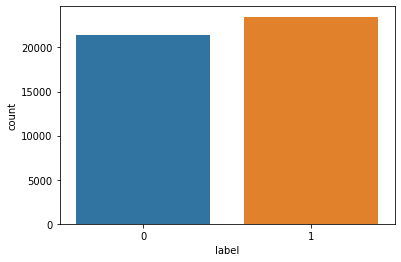

In [19]:
# Explore the target variable
sns.countplot(x='label', data=news_dataset)

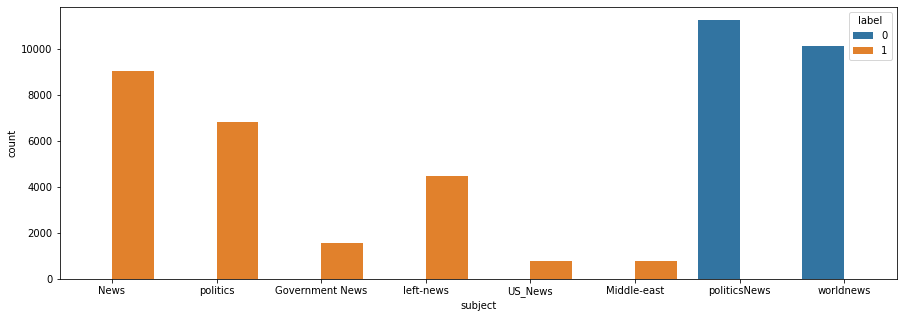

In [20]:
# Explore the subject column
plt.figure(figsize=(15,5))
sns.countplot(x='subject', data=news_dataset, hue='label')

In [21]:
news_dataset['date'] = pd.to_datetime(news_dataset['date'], errors='coerce')
news_dataset['Year'] = news_dataset['date'].dt.year
news_dataset['Month'] = news_dataset['date'].dt.month
news_dataset.head(2)

,title,text,subject,date,label,content,Year,Month
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,Donald Trump Sends Out Embarrassing New Year’...,2017.0,12.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,Drunk Bragging Trump Staffer Started Russian ...,2017.0,12.0


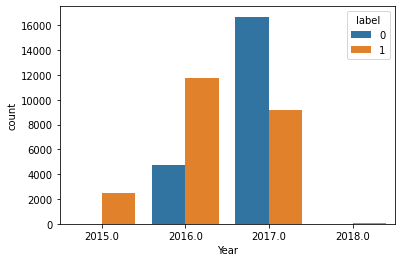

In [22]:
# check the impact of year on tha target
sns.countplot(x='Year', data=news_dataset, hue='label')

**Do Stemming** 

In [23]:
port_stem = PorterStemmer()

In [24]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [25]:
#apply stemming into text
news_dataset['lcontent'] = news_dataset['content'].apply(stemming)

In [26]:
#print text data
print(news_dataset['content'])

0         Donald Trump Sends Out Embarrassing New Year’...
1         Drunk Bragging Trump Staffer Started Russian ...
2         Sheriff David Clarke Becomes An Internet Joke...
3         Trump Is So Obsessed He Even Has Obama’s Name...
4         Pope Francis Just Called Out Donald Trump Dur...
                               ...                        
21412    'Fully committed' NATO backs new U.S. approach...
21413    LexisNexis withdrew two products from Chinese ...
21414    Minsk cultural hub becomes haven from authorit...
21415    Vatican upbeat on possibility of Pope Francis ...
21416    Indonesia to buy $1.14 billion worth of Russia...
Name: content, Length: 44898, dtype: object


In [27]:
#print lcontent data
print(news_dataset['lcontent'])

0        donald trump send embarrass new year eve messa...
1        drunk brag trump staffer start russian collus ...
2        sheriff david clark becom internet joke threat...
3        trump obsess even obama name code websit imag ...
4        pope franci call donald trump christma speech ...
                               ...                        
21412    fulli commit nato back new u approach afghanis...
21413    lexisnexi withdrew two product chines market l...
21414    minsk cultur hub becom author minsk reuter sha...
21415    vatican upbeat possibl pope franci visit russi...
21416    indonesia buy billion worth russian jet jakart...
Name: lcontent, Length: 44898, dtype: object


In [28]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values

In [29]:
print(X)

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [30]:
print(Y)

[1 1 1 ... 0 0 0]


In [31]:
Y.shape

(44898,)

In [32]:
# converting the textual data to numerical data
makevectorizer = TfidfVectorizer()
makevectorizer.fit(X)
X = makevectorizer.transform(X)

In [33]:
print(X)

  (0, 120743)	0.03533095361910199
  (0, 120694)	0.09454592126884645
  (0, 120305)	0.04759247208467729
  (0, 120293)	0.21213973761118518
  (0, 120235)	0.06962229086763583
  (0, 119314)	0.025924985713655056
  (0, 119132)	0.021985849461783565
  (0, 119012)	0.01868952141862031
  (0, 118992)	0.028465539608049074
  (0, 118900)	0.032020085345350065
  (0, 118899)	0.02114319835345511
  (0, 118573)	0.16556027770639092
  (0, 118225)	0.02270658077017686
  (0, 118048)	0.019609899962867938
  (0, 117993)	0.029474569802065552
  (0, 117802)	0.012266908895092256
  (0, 117753)	0.02520345675803165
  (0, 117536)	0.012137760831700223
  (0, 117522)	0.021509496509283244
  (0, 117511)	0.07228204062626231
  (0, 117504)	0.04986260788097417
  (0, 117465)	0.07228204062626231
  (0, 116665)	0.03633035084253069
  (0, 116034)	0.0266488413859451
  (0, 115144)	0.050881452507034006
  :	:
  (44897, 21844)	0.056358670277407916
  (44897, 18162)	0.045765419266381266
  (44897, 18099)	0.06776452188889696
  (44897, 17807)	0.032

In [34]:
#Splitting the dataset to training & test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [35]:
#Make and apply the Model: Logistic Regression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9919260537891865


In [37]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9874164810690423


In [38]:
#Making a Predictive System
X_new = X_test[201]
prediction = model.predict(X_new)
print("System predict : ",prediction[0])
if (prediction[0]==0):
  print('This news is Real')
else:
  print('This news is Fake')

System predict :  1
This news is Fake


In [39]:
#Making a another Predictive System
X_new = X_test[3]
prediction = model.predict(X_new)
print("System predict : ",prediction[0])
if (prediction[0]==0):
  print('This news is Real')
else:
  print('This news is Fake')

System predict :  1
This news is Fake
